<a href="#1-PCA" style="margin-left: 0px;">1 PCA</a>  
<a href="#2-SVD" style="margin-left: 0px;">2 SVD</a>    
<a href="#3-TSNE" style="margin-left: 0px;">3 TSNE</a>   
<a href="#4-UMAP" style="margin-left: 0px;">4 UMAP</a>    
<a href="#5-LocallyLinearEmbedding" style="margin-left: 0px;">5 Locally Linear Embedding</a>   
<a href="#6-The-quality-of-dimensionality-reduction-will-be-evaluated-using-our-own-metric" style="margin-left: 0px;">6 The quality of dimensionality reduction will be evaluated using our own metric</a>   

In [1]:
import pandas as pd
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import umap
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from tensorflow.keras.datasets import mnist

#### –ß—Ç–æ –≤—Ö–æ–¥–∏—Ç –≤ MNIST?  

- 60,000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (train).  
- 10,000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (test).  
- –ö–∞–∂–¥–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ ‚Äì —ç—Ç–æ —á—ë—Ä–Ω–æ-–±–µ–ª–∞—è –∫–∞—Ä—Ç–∏–Ω–∫–∞ 28x28 –ø–∏–∫—Å–µ–ª–µ–π —Å —Ü–∏—Ñ—Ä–æ–π (–æ—Ç 0 –¥–æ 9).  
- –ö–∞–∂–¥—ã–π –ø–∏–∫—Å–µ–ª—å –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç 0 (—á—ë—Ä–Ω—ã–π) –¥–æ 255 (–±–µ–ª—ã–π).  

In [2]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
X_all = np.vstack([X_train, X_test])  # –í—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (70000, 28, 28)
y_all = np.hstack([y_train, y_test])  # –í—Å–µ –º–µ—Ç–∫–∏ (70000,)

print(f"–§–æ—Ä–º–∞ –¥–∞–Ω–Ω—ã—Ö: {X_all.shape}, –º–µ—Ç–∫–∏: {y_all.shape}")

–§–æ—Ä–º–∞ –¥–∞–Ω–Ω—ã—Ö: (70000, 28, 28), –º–µ—Ç–∫–∏: (70000,)


In [3]:
del X_train, y_train, X_test, y_test

In [4]:
X_all_flat = X_all.reshape(X_all.shape[0], -1)  # (70000, 784)

In [5]:
X_all_flat = X_all_flat[:10000]  # (10000, 784)
y_all = y_all[:10000]

In [6]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
unique_values, counts = np.unique(y_all, return_counts=True)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
for value, count in zip(unique_values, counts):
    print(f"–ó–Ω–∞—á–µ–Ω–∏–µ {value} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {count} —Ä–∞–∑(–∞)")

–ó–Ω–∞—á–µ–Ω–∏–µ 0 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1001 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 1 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1127 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 2 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 991 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 3 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1032 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 4 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 980 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 5 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 863 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 6 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1014 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 7 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1070 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 8 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 944 —Ä–∞–∑(–∞)
–ó–Ω–∞—á–µ–Ω–∏–µ 9 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 978 —Ä–∞–∑(–∞)


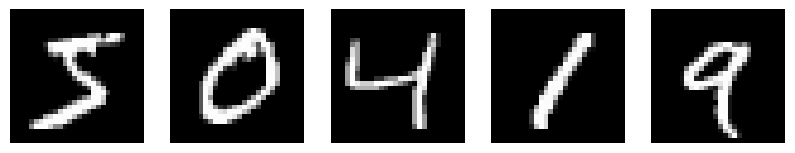

In [7]:
# –ø—Ä–∏–º–µ—Ä —Ü–∏—Ñ–µ—Ä–µ–∫

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_all[i], cmap="gray")
    ax.axis("off")
plt.show()

### 1 PCA

PCA –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É, —á—Ç–æ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã (—Å—Ä–µ–¥–Ω–µ–µ –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É —Ä–∞–≤–Ω–æ –Ω—É–ª—é).

**PCA (Principal Component Analysis)**:
  - –ú–µ—Ç–æ–¥ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏.
  - –û—Å–Ω–æ–≤–Ω–∞—è —Ü–µ–ª—å ‚Äî –Ω–∞–π—Ç–∏ –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (–≥–ª–∞–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã), –∫–æ—Ç–æ—Ä—ã–µ –æ–±—ä—è—Å–Ω—è—é—Ç –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ –≤–∞—Ä–∏–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö.
  - –ì–ª–∞–≤–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞(–∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã) –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω—ã –¥—Ä—É–≥ –¥—Ä—É–≥—É –∏ —É–ø–æ—Ä—è–¥–æ—á–µ–Ω—ã –ø–æ —É–±—ã–≤–∞–Ω–∏—é —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

- –°–Ω–∞—á–∞–ª–∞ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:  
$cov(x,y) = \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N}$  

1) –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–∏ (–æ—Ç—Ä–∞–∂–∞—é—Ç **–ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å** –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏)    

$
A = \begin{bmatrix}
    C_{aa} & C_{ab} & C_{ac} \\
    C_{ab} & C_{bb} & C_{bc} \\
    C_{ac} & C_{bc} & C_{cc} \\
\end{bmatrix}
$

**–ü—Ä–∏–º–µ—Ä:**    
–ü—É—Å—Ç—å —É –Ω–∞—Å –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ 10 —Å—Ç—Ä–æ–∫ –Ω–∞ 5 —Å—Ç–æ–ª–±—Ü–æ–≤,  
–£ –Ω–∞—Å 5 —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π (5 —Å—Ç–æ–ª–±—Ü–æ–≤), —Ç–æ–≥–¥–∞ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –±—É–¥–µ—Ç 5 –Ω–∞ 5

–ö–∞–∫ —Å—á–∏—Ç–∞–µ—Ç—Å—è 1 —ç–ª–µ–º–µ–Ω—Ç **$C_{aa}$** ?   
–ú—ã –±–µ—Ä–µ–º –ø–µ—Ä–≤—ã–µ 2 —Å—Ç–æ–ª–±—Ü–∞, –¥–æ–ø—É—Å—Ç–∏–º 

1-—ã–π —Å—Ç–æ–ª–±–µ—Ü = [170, 165, 180, 175, 160, 185, 172, 168, 178, 182], —Å—Ä–µ–¥–Ω–µ–µ $\bar{X}_1 = 173.5$  
2-–æ–π —Å—Ç–æ–ª–±–µ—Ü = [70, 65, 80, 75, 60, 85, 72, 68, 78, 83], —Å—Ä–µ–¥–Ω–µ–µ $\bar{X}_2 = 73.6$  

**$C_{aa}$** = (170-173.5)*(70-73.6) + (165-173.5)*(65-73.6) + ... + (180-173.5)*(80-73.6) = 577.0

2) –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞ –º–∞—Ç—Ä–∏—Ü—ã  
3) –°–æ—Ä—Ç–∏—Ä—É–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞ –ø–æ —Å–æ–±–µ—Å—Ç–≤–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤ —É–±—ã–≤–∞—é—â–µ–º –ø–æ—Ä—è–¥–∫–µ  
4) –í—ã–±–∏—Ä–∞–µ–º k —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–º, –æ–±—Ä–∞–∑—É–µ—Ç—Å—è –Ω–æ–≤–æ–µ k-–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ  
5) –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏ –∏–∑ n-–º–µ—Ä–Ω–æ–≥–æ –≤ k-–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ  


$–§_{A}(Œª) = |A-ŒªE| = 0$ (–Ω–∞–ø—Ä–∏–º–µ—Ä: $-Œª^{3}+Œª^{2}+2Œª=0$, (A - –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ)  
$AV_{i} = Œª_{i}V{i}$ ($V_{i}$‚â†0), $V_{i}$ - —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π –≤–µ–∫—Ç–æ—Ä,    
 
  
V - –º–∞—Ç—Ä–∏—Ü–∞ –±–∞–∑–∏—Å–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤  
$X^{new} = V_{—É—Å–µ—á–µ–Ω–Ω–∞—è}X^{old}$    
$V_{—É—Å–µ—á–µ–Ω–Ω–∞—è}$ - –±–µ—Ä–µ–º —Å—Ç–æ–ª—å–∫–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π, —Å–∫–æ–ª—å–∫–æ –Ω—É–∂–Ω–æ –≤ –∑–∞–¥–∞—á–µ  

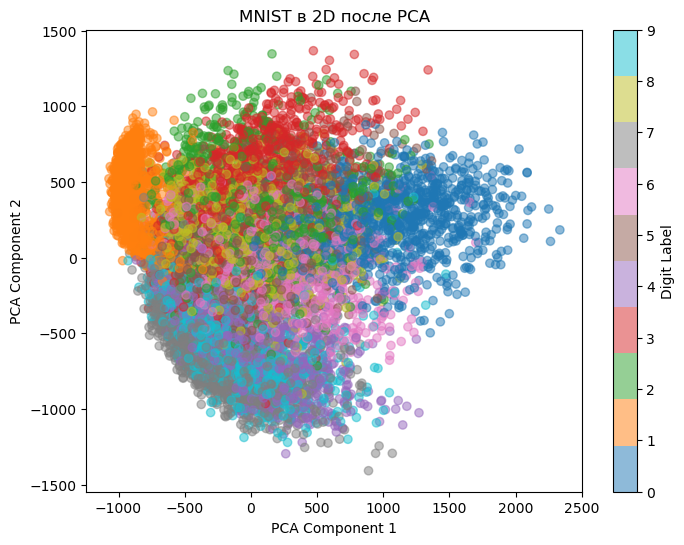

CPU times: total: 1.7 s
Wall time: 870 ms


In [8]:
%%time

# –ü—Ä–∏–º–µ–Ω—è–µ–º PCA –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ c 784 –¥–æ 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_flat)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 784 -> 2

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_all, cmap="tab10", alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("MNIST –≤ 2D –ø–æ—Å–ª–µ PCA")
plt.show()

### 2 SVD

### 2.1 –ö—Ä–∞—Ç–∫–æ SVD

Truncated SVD —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞–ø—Ä—è–º—É—é —Å –º–∞—Ç—Ä–∏—Ü–µ–π –¥–∞–Ω–Ω—ã—Ö (–Ω–µ —Ç—Ä–µ–±—É–µ—Ç —Ü–µ–Ω—Ç—Ä–æ–≤–∫–∏).

**1 SVD —Ä–∞–∑–ª–æ–∂–∏—Ç —ç—Ç—É –º–∞—Ç—Ä–∏—Ü—É –Ω–∞:**  
$$
A = U \Sigma V^T
$$

- $U$ —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è—Ö.
- $\Sigma$ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ "–≤–µ—Å" –∫–∞–∂–¥–æ–≥–æ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ —Ñ–∞–∫—Ç–æ—Ä–∞.
- $V^T$ —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ñ–∏–ª—å–º–∞—Ö.

**2 –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏**
$$
X_k = U_k \Sigma_k
$$

### 2.2 –†–∞–∑–ª–∏—á–∏—è PCA –∏ SVD

PCA –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –í PCA –º—ã –ø—Ä–æ—Ö–æ–¥–∏–º –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π $C = \frac{1}{n} X^T X$, –≥–¥–µ $X$ ‚Äî —ç—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ –¥–∞–Ω–Ω—ã—Ö. –°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã –¥–∞—é—Ç –≥–ª–∞–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –∞ –∏—Ö —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî —ç—Ç–æ –≤–µ–ª–∏—á–∏–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã —ç—Ç–∏ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –¥–ª—è –æ–ø–∏—Å–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö.

SVD –∂–µ —Ä–∞—Å–∫–ª–∞–¥—ã–≤–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –¥–∞–Ω–Ω—ã—Ö $A$ –∫–∞–∫ $A = U \Sigma V^T$, –≥–¥–µ –º–∞—Ç—Ä–∏—Ü–∞ $U$ —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–µ–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã (–∞—Å—Å–æ—Ü–∏–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å –¥–∞–Ω–Ω—ã–º–∏), $\Sigma$ ‚Äî —ç—Ç–æ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∞ $V$ ‚Äî –ø—Ä–∞–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã. SVD –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π, –∫–∞–∫ PCA, –∏ –º–æ–∂–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å—Å—è –∫ –ª—é–±—ã–º –º–∞—Ç—Ä–∏—Ü–∞–º, –≤–∫–ª—é—á–∞—è –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã–µ, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ.

- SVD —Ä–∞–∑–ª–∞–≥–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É $A$ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:
$A = U \Sigma V^T$,
–≥–¥–µ:

### –ö–∞–∫ –Ω–∞—Ö–æ–¥—è—Ç—Å—è —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –≤–µ–∫—Ç–æ—Ä—ã?

#### –°–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ($\sigma_i$):

–°–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî —ç—Ç–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ –∫–æ—Ä–Ω–∏ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–∞—Ç—Ä–∏—Ü $A^T A$ –∏–ª–∏ $A A^T$:

$$
\sigma_i = \sqrt{\lambda_i}, \quad \text{–≥–¥–µ } \lambda_i \text{ ‚Äî —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ } A^T A \text{ –∏–ª–∏ } A A^T.
$$

–°–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∏–∑ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è:

$$
\det(A^T A - \lambda I) = 0
$$

---

#### –ü—Ä–∞–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã ($V$):

–ü—Ä–∞–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã ‚Äî —ç—Ç–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –º–∞—Ç—Ä–∏—Ü—ã $A^T A$:

$$
(A^T A) v_i = \lambda_i v_i
$$

–°—Ç–æ–ª–±—Ü—ã –º–∞—Ç—Ä–∏—Ü—ã $V$ ‚Äî —ç—Ç–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã $v_i$:

$$
V = [v_1, v_2, \dots, v_n]
$$

---

#### –õ–µ–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã ($U$):

–õ–µ–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã ‚Äî —ç—Ç–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –º–∞—Ç—Ä–∏—Ü—ã $A A^T$:

$$
(A A^T) u_i = \lambda_i u_i
$$

–õ–∏–±–æ –∏—Ö –º–æ–∂–Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç—å —á–µ—Ä–µ–∑ –ø—Ä–∞–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:

$$
A v_i = \sigma_i u_i
$$

–≥–¥–µ $v_i$ ‚Äî –ø—Ä–∞–≤—ã–π —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä, $\sigma_i$ ‚Äî —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∞ $u_i$ ‚Äî –ª–µ–≤—ã–π —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä.


### 2.3 SVD –ü—Ä–∏–º–µ—Ä —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã 2√ó2

#### üîπ –®–∞–≥ 1: –ù–∞—Ö–æ–¥–∏–º –ø—Ä–∞–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã $V$

–†–µ—à–∞–µ–º –∑–∞–¥–∞—á—É –Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è $A^T A$:

–í—ã—á–∏—Å–ª—è–µ–º $A^T A$:

$$
A^T A = \begin{bmatrix} 
1 & 3 \\ 
2 & 4 
\end{bmatrix}^T
\begin{bmatrix} 
1 & 3 \\ 
2 & 4 
\end{bmatrix}
= \begin{bmatrix} 
5 & 11 \\ 
11 & 25 
\end{bmatrix}
$$

(–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –≤–∞—à–µ–º –ø—Ä–∏–º–µ—Ä–µ –±—ã–ª–∞ –Ω–µ–±–æ–ª—å—à–∞—è –æ—à–∏–±–∫–∞ –≤ —Ä–∞—Å—á–µ—Ç–µ $A^T A$. –ü—Ä–∞–≤–∏–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ ‚Äî $\begin{bmatrix} 5 & 11 \\ 11 & 25 \end{bmatrix}$.)

–ù–∞—Ö–æ–¥–∏–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è $\lambda$:

$$
\det(A^T A - \lambda I) = \det\begin{bmatrix} 
5-\lambda & 11 \\ 
11 & 25-\lambda 
\end{bmatrix} = (5-\lambda)(25-\lambda) - 121 = \lambda^2 - 30\lambda + 4 = 0
$$

–ö–æ—Ä–Ω–∏ —É—Ä–∞–≤–Ω–µ–Ω–∏—è:

$$
\lambda_1 \approx 29.87, \quad \lambda_2 \approx 0.13
$$

–ù–∞—Ö–æ–¥–∏–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã $v_i$ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ $\lambda_i$:

–î–ª—è $\lambda_1 \approx 29.87$:

$$
(A^T A - 29.87 I)v_1 = 0 \quad \Rightarrow \quad 
\begin{bmatrix} 
-24.87 & 11 \\
11 & -4.87 
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
= 0
$$

–†–µ—à–µ–Ω–∏–µ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ):

$$
v_1 \approx \begin{bmatrix} 0.42 \\ 0.91 \end{bmatrix}
$$

–î–ª—è $\lambda_2 \approx 0.13$:

$$
(A^T A - 0.13 I)v_2 = 0 \quad \Rightarrow \quad
\begin{bmatrix} 
4.87 & 11 \\
11 & 24.87
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
= 0
$$

–†–µ—à–µ–Ω–∏–µ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ):

$$
v_2 \approx \begin{bmatrix} -0.91 \\ 0.42 \end{bmatrix}
$$

–ú–∞—Ç—Ä–∏—Ü–∞ $V$:

$$
V = \begin{bmatrix} v_1 & v_2 \end{bmatrix} \approx 
\begin{bmatrix} 
0.42 & -0.91 \\ 
0.91 & 0.42 
\end{bmatrix}, \quad V^T \approx \begin{bmatrix} 0.42 & 0.91 \\ -0.91 & 0.42 \end{bmatrix}
$$

#### üîπ –®–∞–≥ 2: –ù–∞—Ö–æ–¥–∏–º –ª–µ–≤—ã–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã $U$

–°–ø–æ—Å–æ–± 1: –ß–µ—Ä–µ–∑ $A v_i = \sigma_i u_i$.

–î–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è $\sigma_i$ –≤—ã—á–∏—Å–ª—è–µ–º $u_i$:

–î–ª—è $\sigma_1 \approx 5.47$:

$$
u_1 = \frac{A v_1}{\sigma_1} = \frac{1}{5.47} \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix} \begin{bmatrix} 0.42 \\ 0.91 \end{bmatrix} \approx \frac{1}{5.47} \begin{bmatrix} 3.15 \\ 5.26 \end{bmatrix} \approx \begin{bmatrix} 0.58 \\ 0.81 \end{bmatrix}
$$

–î–ª—è $\sigma_2 \approx 0.36$:

$$
u_2 = \frac{A v_2}{\sigma_2} = \frac{1}{0.36} \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix} \begin{bmatrix} -0.91 \\ 0.42 \end{bmatrix} \approx \frac{1}{0.36} \begin{bmatrix} -0.25 \\ -0.14 \end{bmatrix} \approx \begin{bmatrix} -0.81 \\ 0.58 \end{bmatrix}
$$

–ú–∞—Ç—Ä–∏—Ü–∞ $U$:

$$
U = \begin{bmatrix} u_1 & u_2 \end{bmatrix} \approx 
\begin{bmatrix} 
0.58 & -0.81 \\ 
0.81 & 0.58 
\end{bmatrix}
$$

#### üîπ –®–∞–≥ 3: –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è

–£–º–Ω–æ–∂–∞–µ–º $U \Sigma V^T$ –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å $A$:

$$
U \Sigma V^T \approx 
\begin{bmatrix} 
0.58 & -0.81 \\ 
0.81 & 0.58 
\end{bmatrix}
\begin{bmatrix} 
5.47 & 0 \\ 
0 & 0.36 
\end{bmatrix}
\begin{bmatrix} 
0.42 & 0.91 \\ -0.91 & 0.42 
\end{bmatrix}
\approx \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix} = A
$$


### 2.4 SVD –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞—Å–º–µ—Ä–Ω–æ—Å—Ç–∏

–î–ª—è –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ $k$ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∏–º –≤–µ–∫—Ç–æ—Ä—ã. –ï—Å–ª–∏ –Ω–∞–º –Ω—É–∂–Ω–æ –ø–æ–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2, —Ç–æ –º—ã –≤—ã–±–∏—Ä–∞–µ–º –ø–µ—Ä–≤—ã–µ –¥–≤–∞ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∏–º –≤–µ–∫—Ç–æ—Ä—ã.

–¢–æ–≥–¥–∞ —É –Ω–∞—Å –±—É–¥–µ—Ç:

- $\Sigma_k$ ‚Äî –º–∞—Ç—Ä–∏—Ü–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∞—è —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ –¥–≤–∞ —Å–∏–Ω–≥—É–ª—è—Ä–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è,
- $U_k$ ‚Äî –º–∞—Ç—Ä–∏—Ü–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∞—è —Ç–æ–ª—å–∫–æ –¥–≤–∞ –ø–µ—Ä–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞ –∏–∑ –º–∞—Ç—Ä–∏—Ü—ã $U$,
- $V_k$ ‚Äî –º–∞—Ç—Ä–∏—Ü–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∞—è —Ç–æ–ª—å–∫–æ –¥–≤–∞ –ø–µ—Ä–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞ –∏–∑ –º–∞—Ç—Ä–∏—Ü—ã $V$.

–¢–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å —É–º–µ–Ω—å—à–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –¥–∞–Ω–Ω—ã—Ö $X_k$ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ $m \times 2$:

$$
X_k = U_k \Sigma_k
$$

–≥–¥–µ:
- $U_k$ ‚Äî —ç—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ $m \times 2$,
- $\Sigma_k$ ‚Äî –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ $2 \times 2$,
- $X_k$ ‚Äî —ç—Ç–æ –ø–æ–Ω–∏–∂–µ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ $m \times 2$, –∫–æ—Ç–æ—Ä–∞—è —Ç–µ–ø–µ—Ä—å —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–æ–µ–∫—Ü–∏–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –¥–≤—É–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ.

- –ú–∞—Ç—Ä–∏—Ü–∞ $X_k$ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –ø—Ä–æ–µ–∫—Ü–∏–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –Ω–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ, –∏ –¥–ª—è —ç—Ç–æ–≥–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ–ª—å–∫–æ –ø–µ—Ä–µ–º–Ω–æ–∂–∏—Ç—å –º–∞—Ç—Ä–∏—Ü—ã $U_k$ –∏ $\Sigma_k$. –≠—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –º–∞—Ç—Ä–∏—Ü—É, –≤ –∫–æ—Ç–æ—Ä–æ–π —Å—Ç—Ä–æ–∫–∏ ‚Äî —ç—Ç–æ –Ω–æ–≤—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è (–≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –ø—Ä–æ–µ–∫—Ü–∏–∏) –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —É–º–µ–Ω—å—à–µ–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏.

- –ú–∞—Ç—Ä–∏—Ü–∞ $V_k$ (—Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –¥–ª—è –ø—Ä–∞–≤–æ–π –º–∞—Ç—Ä–∏—Ü—ã $A$) –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–µ—Å–ª–∏ –±—ã –Ω–∞–º –Ω—É–∂–Ω–æ –±—ã–ª–æ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å —Ç–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –∏—Ö –ø—Ä–æ–µ–∫—Ü–∏–π, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ –ø–æ–ª–Ω–æ–π —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏). –î–ª—è –∂–µ –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–±–æ—Ç—ã —Å –º–∞—Ç—Ä–∏—Ü–∞–º–∏ $U_k$ –∏ $\Sigma_k$, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∏ —É–∂–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–µ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–µ–∫—Ü–∏–π.

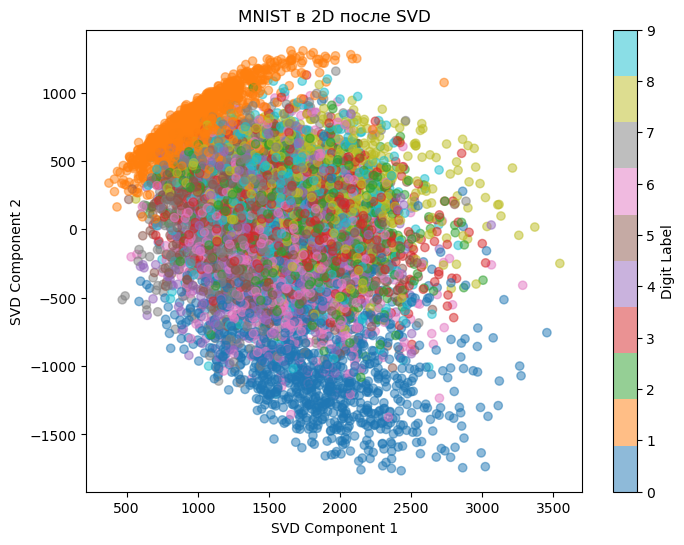

In [9]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º SVD –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ c 784 –¥–æ 2

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_all_flat)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 784 -> 2

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_all, cmap="tab10", alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("MNIST –≤ 2D –ø–æ—Å–ª–µ SVD")
plt.show()

### 3 TSNE

t-SNE ‚Äî —ç—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã–π –õ–æ—Ä–µ–Ω—Å–æ–º –≤–∞–Ω –¥–µ—Ä –ú–∞–∞—Ç–µ–Ω–æ–º –∏ –î–∂–µ—Ñ—Ñ—Ä–∏ –•–∏–Ω—Ç–æ–Ω–æ–º –≤ 2008 –≥–æ–¥—É.

### –ö—Ä–∞—Ç–∫–∏–π –∞–ª–≥–æ—Ä–∏—Ç–º –º–µ—Ç–æ–¥–∞ TSNE

1) –°—Ç—Ä–æ–∏–º —Ç–∞–±–ª–∏—Ü—É n –Ω–∞ n —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—É—é, –≥–¥–µ –∫–∞–∂–¥–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã —ç—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç 0 –¥–æ 1 —á—Ç–æ —ç—Ç–∏ —Ç–æ—á–∫–∏ —Å–æ—Å–µ–¥–∏

2) –î–∞–ª–µ–µ –≤ –Ω–∞—à–µ–π –Ω–æ–≤–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, 2 –º—ã —Å–ª—É—á–∞–π–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ—á–∫–∏ –∏ —Ç–æ—á–Ω–æ —Ç–∞–∫ –∂–µ —Å—Ç—Ä–æ–∏–º –¥–ª—è –Ω–∏—Ö —Å–≤–æ—é —Ç–∞–±–ª–∏—Ü—É   

3) –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É—è —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ –ö—É–ª—å–±–∞–∫–∞-–õ–µ–π–±–ª–µ—Ä–∞ –º–µ–∂–¥—É 1-–æ–π –∏ 2-–æ–π —Ç–∞–±–ª–∏—Ü–µ–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º, –ø–æ–¥–±–∏—Ä–∞–µ–º —Ç–æ—á–∫–∏ –∏–∑ –º–∞–ª–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Ç–∞–∫, —á—Ç–æ–±—ã –≤—Ç–æ—Ä–∞—è —Ç–∞–±–ª–∏—Ü–∞ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–¥–∏–ª–∞ –Ω–∞ 1-—É—é

### –ë–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –º–µ—Ç–æ–¥–∞ TSNE, –Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é "–ø—Ä–æ–∫–æ–ø–∞–ª" –∞–ª–≥–æ—Ä–∏—Ç–º

1. **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ**

–î–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã —Ç–æ—á–µ–∫ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, —á—Ç–æ –æ–Ω–∏ —è–≤–ª—è—é—Ç—Å—è "—Å–æ—Å–µ–¥—è–º–∏":

$$
p_{j|i} = \frac{\exp\left(-\|x_i - x_j\|^2 / 2\sigma_i^2\right)}{\sum_{k \neq i} \exp\left(-\|x_i - x_k\|^2 / 2\sigma_i^2\right)}
$$

–≥–¥–µ:

- $x_i, x_j$ ‚Äî —Ç–æ—á–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ,  
- $\sigma_i$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π —Ç–∞–∫, —á—Ç–æ–±—ã —É –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ –±—ã–ª–æ "—Ä–∞–∑—É–º–Ω–æ–µ" —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π (–æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —á–µ—Ä–µ–∑ –ø–µ—Ä–ø–ª–µ–∫—Å–∏—é).


**–ü–µ—Ä–ø–ª–µ–∫—Å–∏—è (Perplexity)**  
–û–ø—Ä–µ–¥–µ–ª—è–µ—Ç —á–∏—Å–ª–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏.

–¢–æ –µ—Å—Ç—å —ç—Ç–æ "–Ω–∞—Å—Ç—Ä–æ–π–∫–∞ —Ä–∞–¥–∏—É—Å–∞ –≤–Ω–∏–º–∞–Ω–∏—è" –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏:

–¢–∏–ø–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: –æ—Ç 5 –¥–æ 50.

–ú–∞–ª–∞—è –ø–µ—Ä–ø–ª–µ–∫—Å–∏—è ‚Üí –∞–∫—Ü–µ–Ω—Ç –Ω–∞ –ª–æ–∫–∞–ª—å–Ω—ã—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä–∞—Ö.

–ë–æ–ª—å—à–∞—è –ø–µ—Ä–ø–ª–µ–∫—Å–∏—è ‚Üí –≥–ª–æ–±–∞–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞.

**–ü–æ–ª—É—á–∞–µ–º**  
–ú–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–æ–º $n \times n$, –≥–¥–µ $n$ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.  

–í—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî –æ—Ç 0 –¥–æ 1.

–ö–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã ‚Äî —ç—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π "–±—ã—Ç—å —Å–æ—Å–µ–¥–æ–º" –¥–ª—è —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ç–æ—á–∫–∏ $x_i$ —Å—Ä–µ–¥–∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

**–ó–∞—Ç–µ–º —Å–∏–º–º–µ—Ç—Ä–∏–∑—É–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏:**  

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$

–≥–¥–µ $N$ ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫.

**–ü–æ–ª—É—á–∞–µ–º —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É**  

2. **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –º–µ–Ω—å—à–µ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏**

–ú—ã —Å–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–µ —Ç–æ—á–∫–∏ $y_1, y_2, ..., y_n$ –≤ 2D-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ  

–≠—Ç–∏ —Ç–æ—á–∫–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è —Å–ª—É—á–∞–π–Ω–æ (–æ–±—ã—á–Ω–æ –º–∞–ª–µ–Ω—å–∫–∏–º–∏ —Å–ª—É—á–∞–π–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–æ —Å—Ä–µ–¥–Ω–∏–º 0 –∏ –º–∞–ª–µ–Ω—å–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π)  

–í –Ω–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 2D), –¥–ª—è —Ç–æ—á–µ–∫ $y_i$ –∏ $y_j$ —Å—Ç—Ä–æ–∏—Ç—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –ø–æ—Ö–æ–∂–µ–µ –Ω–∞ t-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞ (—á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å "—Å–∫–ª–µ–∏–≤–∞–Ω–∏—è" —Ç–æ—á–µ–∫ –∏–∑-–∑–∞ "–ø—Ä–æ–∫–ª—è—Ç–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏"):

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \ne l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

3. **–ú–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏**

–ê–ª–≥–æ—Ä–∏—Ç–º –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ —Ç–æ—á–µ–∫ $y_i$, –º–∏–Ω–∏–º–∏–∑–∏—Ä—É—è —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ –ö—É–ª—å–±–∞–∫–∞-–õ–µ–π–±–ª–µ—Ä–∞ –º–µ–∂–¥—É $p_{ij}$ –∏ $q_{ij}$:

$$
KL(P \parallel Q) = \sum_{i \ne j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

–î–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **–≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫**.

**–ü–ª—é—Å—ã –∏ –º–∏–Ω—É—Å—ã TSNE**  

**‚úî –ü–ª—é—Å—ã:**  
–û—Ç–ª–∏—á–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –ª–æ–∫–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã.

–•–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –¥–∞–Ω–Ω—ã—Ö —Å –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π.

–ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã—Å–æ–∫–æ–º–µ—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, word embeddings, MNIST).

**‚úñ –ú–∏–Ω—É—Å—ã:**  
–†–µ–∑—É–ª—å—Ç–∞—Ç –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–ø–µ—Ä–ø–ª–µ–∫—Å–∏—è, learning rate).

–ú–µ–¥–ª–µ–Ω–Ω—ã–π –¥–ª—è –±–æ–ª—å—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ (O(N¬≤)).

–ì–ª–æ–±–∞–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –º–æ–∂–µ—Ç –∏—Å–∫–∞–∂–∞—Ç—å—Å—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –Ω–µ –≤—Å–µ–≥–¥–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã).

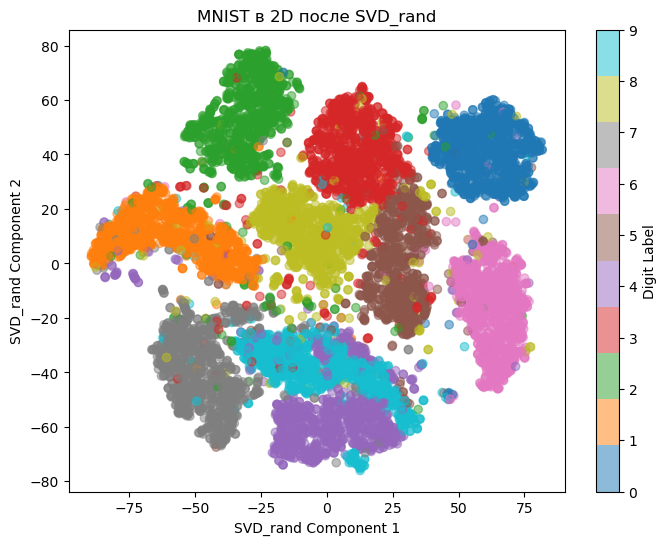

CPU times: total: 3min 57s
Wall time: 57.4 s


In [10]:
%%time 

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_all_flat)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 784 -> 2

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_all, cmap="tab10", alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("SVD_rand Component 1")
plt.ylabel("SVD_rand Component 2")
plt.title("MNIST –≤ 2D –ø–æ—Å–ª–µ SVD_rand")
plt.show()

### 4 UMAP

### –ê–ª–≥–æ—Ä–∏—Ç–º UMAP

1. **–°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ —Å–æ—Å–µ–¥–µ–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.**  
   –î–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ $x_i$ –Ω–∞—Ö–æ–¥–∏–º $k$ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (–æ–±—ã—á–Ω–æ 15‚Äì50), –∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤–∑–≤–µ—à–µ–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Å–≤—è–∑–µ–π –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏.  
   –≠—Ç–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç—Ä–∞–∂–∞—é—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–æ—á–∫–∏ "–±–ª–∏–∑–∫–∏" –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É –≤ –≤—ã—Å–æ–∫–æ—Ä–∞–∑–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ:

   $$
   p_{ij} = \exp\left(-\frac{\|x_i - x_j\| - \rho_i}{\sigma_i}\right)
   $$

   –≥–¥–µ $\rho_i$ ‚Äî –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –ª—é–±–æ–≥–æ —Å–æ—Å–µ–¥–∞ (—á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –ª–æ–∫–∞–ª—å–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É),  
   –∞ $\sigma_i$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø–æ–¥–±–∏—Ä–∞–µ–º—ã–π —Ç–∞–∫, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å "—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é –ø–ª–æ—Ç–Ω–æ—Å—Ç—å" —Å–æ—Å–µ–¥–µ–π.

2. **–°—Ç—Ä–æ–∏–º —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–π –≥—Ä–∞—Ñ (–∞–Ω–∞–ª–æ–≥ –º–∞—Ç—Ä–∏—Ü—ã $P$):**  
   –ü–æ—Å–ª–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π —Å–≤—è–∑–µ–π, UMAP —Å–∏–º–º–µ—Ç—Ä–∏–∑—É–µ—Ç –∏—Ö:
   
   $$
   P_{ij} = p_{ij} + p_{ji} - p_{ij} \cdot p_{ji}
   $$

   –≠—Ç–æ —Å–æ–∑–¥–∞–µ—Ç –≤–∑–≤–µ—à–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ, –≥–¥–µ –≤–µ—Å–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å–∏–ª–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏.

3. **–°–ª—É—á–∞–π–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ—á–µ–∫ –≤ –Ω–∏–∑–∫–æ—Ä–∞–∑–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.**  
   –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ 2D ‚Äî –ø–æ–ª—É—á–∞–µ–º —Ç–æ—á–∫–∏ $y_1, y_2, \dots, y_n$.

4. **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è —Ç–æ—á–µ–∫ –≤ –Ω–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.**  
   –°—Ç—Ä–æ–∏—Ç—Å—è –≥—Ä–∞—Ñ –≤ 2D-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å –ø–æ–º–æ—â—å—é "–º—è–≥–∫–æ–π" –ª–æ–≥–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏:

   $$
   q_{ij} = \frac{1}{1 + a \cdot \|y_i - y_j\|^{2b}}
   $$

   –≥–¥–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã $a$ –∏ $b$ –ø–æ–¥–æ–±—Ä–∞–Ω—ã —Ç–∞–∫, —á—Ç–æ–±—ã –ø—Ä–∏–±–ª–∏–∂–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ t-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

5. **–ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è –º–µ–∂–¥—É –≥—Ä–∞—Ñ–∞–º–∏ $P$ –∏ $Q$.**  
   –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –º–µ—Ç–æ–¥–æ–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞:

   - –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –ø—Ä–∏—Ç—è–∂–µ–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ —Å–æ—Å–µ–¥—è–º–∏ –≤ $P$.
   - –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –æ—Ç—Ç–∞–ª–∫–∏–≤–∞–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –±—ã–ª–∏ —Å–≤—è–∑–∞–Ω—ã.

   –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è **–ª–æ–∫–∞–ª—å–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞** –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏ –ø–µ—Ä–µ—Ö–æ–¥–µ –∫ –º–µ–Ω—å—à–µ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏.

C:\Users\Rinat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


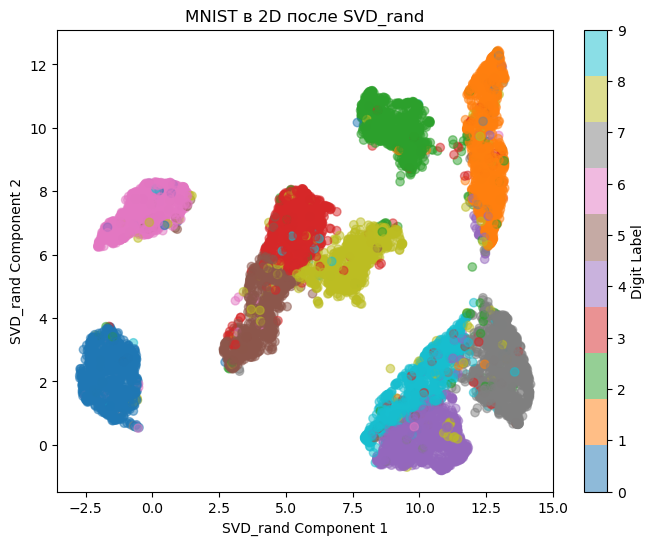

CPU times: total: 42.5 s
Wall time: 42.7 s


In [11]:
%%time

umap = umap.UMAP(n_components=2, random_state=42, n_jobs=-1)  # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç –≤—Å–µ —è–¥—Ä–∞ –¥–ª—è –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ—Å—Ç–∏
X_umap = umap.fit_transform(X_all_flat)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 784 -> 2

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_all, cmap="tab10", alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("SVD_rand Component 1")
plt.ylabel("SVD_rand Component 2")
plt.title("MNIST –≤ 2D –ø–æ—Å–ª–µ SVD_rand")
plt.show()

### 5 LocallyLinearEmbedding

### –ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º Locally Linear Embedding (LLE)?

1. **–ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π**:
   
   –î–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö (–æ–±—ä–µ–∫—Ç–∞) –º—ã –Ω–∞—Ö–æ–¥–∏–º –µ–µ $ k $-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –µ–≤–∫–ª–∏–¥–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏.

2. **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤**:
   
   –ö–∞–∂–¥—É—é —Ç–æ—á–∫—É –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∫–∞–∫ –ª–∏–Ω–µ–π–Ω—É—é –∫–æ–º–±–∏–Ω–∞—Ü–∏—é –µ–µ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π. –≠—Ç–æ –¥–µ–ª–∞–µ—Ç—Å—è —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫—É —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏:
   
   $$
   x_i \approx \sum_{j \in N(i)} w_{ij} x_j
   $$
   
   –≥–¥–µ $ x_i $ ‚Äî —ç—Ç–æ —Ç–æ—á–∫–∞ $ i $, –∞ $ x_j $ ‚Äî —Å–æ—Å–µ–¥–∏, $ w_{ij} $ ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏. –≠—Ç–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã $ w_{ij} $ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –ø—É—Ç–µ–º —Ä–µ—à–µ–Ω–∏—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏, –º–∏–Ω–∏–º–∏–∑–∏—Ä—É—è —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É —Ç–æ—á–∫–æ–π –∏ –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –µ–µ —Å–æ—Å–µ–¥–µ–π.

3. **–ú–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è –ø–æ—Ç–µ—Ä—å –ø—Ä–∏ –ø—Ä–æ–µ–∫—Ü–∏–∏**:

   –ü–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ –¥–ª—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫ –≤—ã—á–∏—Å–ª–µ–Ω—ã –ª–∏–Ω–µ–π–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, –∞–ª–≥–æ—Ä–∏—Ç–º –ø—ã—Ç–∞–µ—Ç—Å—è –Ω–∞–π—Ç–∏ —Ç–∞–∫–æ–µ –Ω–∏–∑–∫–æ—Ä–∞–∑–º–µ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Ç–æ—á–µ–∫ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ 2D –∏–ª–∏ 3D), –∫–æ—Ç–æ—Ä–æ–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —ç—Ç–∏ –ª–æ–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–µ–π–Ω—ã–µ —Å–≤—è–∑–∏. –¢–æ –µ—Å—Ç—å, –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ $ i $ –≤ –Ω–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –¥–æ–ª–∂–Ω–æ –≤—ã–ø–æ–ª–Ω—è—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–µ–µ —É—Å–ª–æ–≤–∏–µ:
   
   $$
   y_i \approx \sum_{j \in N(i)} w_{ij} y_j
   $$
   
   –≥–¥–µ $ y_i $ ‚Äî —ç—Ç–æ –Ω–æ–≤–∞—è –ø—Ä–æ–µ–∫—Ü–∏—è —Ç–æ—á–∫–∏ $ x_i $ –≤ –Ω–∏–∑–∫–æ—Ä–∞–∑–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ, –∞ $ y_j $ ‚Äî —ç—Ç–æ –Ω–æ–≤—ã–µ –ø—Ä–æ–µ–∫—Ü–∏–∏ —Å–æ—Å–µ–¥–µ–π. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ —ç—Ç–æ–π –æ—à–∏–±–∫–∏ –¥–ª—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫, —á—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—é –ª–æ–∫–∞–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö.

4. **–ü–æ–∏—Å–∫ –ø—Ä–æ–µ–∫—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**:

   –î–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–µ—Ç–æ–¥, –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π –∑–∞–¥–∞—á–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è (eigenproblem). –î–ª—è —ç—Ç–æ–≥–æ —Å—Ç—Ä–æ–∏—Ç—Å—è –º–∞—Ç—Ä–∏—Ü–∞ –≥—Ä–∞—Ñ–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ª–∏–Ω–µ–π–Ω—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ $ w_{ij} $, –∏ –∑–∞—Ç–µ–º —Ä–µ—à–∞–µ—Ç—Å—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –¥–ª—è —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã.

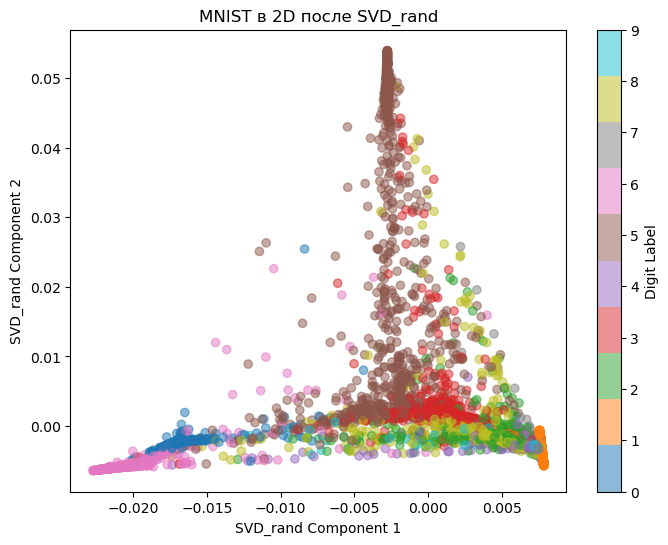

CPU times: total: 48.7 s
Wall time: 12.2 s


In [12]:
%%time
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, tol=1e-06)
X_lle = lle.fit_transform(X_all_flat)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 784 -> 2

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_all, cmap="tab10", alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("SVD_rand Component 1")
plt.ylabel("SVD_rand Component 2")
plt.title("MNIST –≤ 2D –ø–æ—Å–ª–µ SVD_rand")
plt.show()

### 6 The quality of dimensionality reduction will be evaluated using our own metric

**–û—Ü–µ–Ω–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–≤–æ–µ–π –º–µ—Ç—Ä–∏–∫–æ–π**  

In [13]:
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

–°–Ω–∞—á–∞–ª–∞ –≤—Å–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–æ–¥—è—Ç—Å—è –∫ –∑–Ω–∞—á–µ–Ω–∏—è–º –æ—Ç 0 –¥–æ 1 –ø—Ä–∏ –ø–æ–º–æ—â–∏ MinMaxScaler()  

–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç 3 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:  
   
- —Å—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
- —Å—Ä–µ–¥–Ω–µ–µ –º–µ–∂–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
- —Ç–∞–±–ª–∏—Ü—É –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞

In [14]:
def compute_mean_distances(X, y):
    # –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –∫–∞–∂–¥—É—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É —Ç–∞–∫, —á—Ç–æ–±—ã min=0, max=1
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    unique_classes = np.unique(y)
    intra_class_distances = []
    intra_class_table = []

    # –í–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
    for c in unique_classes:
        class_points = X_scaled[y == c]
        dist_matrix = cdist(class_points, class_points, metric='euclidean')
        np.fill_diagonal(dist_matrix, 0)  # –£–±–∏—Ä–∞–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Å–∞–º–∏—Ö —Ç–æ—á–µ–∫ –¥–æ —Å–µ–±—è
        mean_distance = dist_matrix.mean() # —Å—Ä–µ–¥–Ω–∏–µ –¥–∏—Å—Ç–∞–Ω—Ü–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ 
        # (—Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π, –≥–¥–µ –∫–∞–∂–¥—ã–π —ç–ª-—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ i-–æ–π —Ç–æ—á–∫–∏ –¥–æ j-–æ–π)
        intra_class_distances.append(mean_distance) 
        intra_class_table.append((c, mean_distance))  # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º –∫–ª–∞—Å—Å –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ

    # –°–æ–∑–¥–∞—ë–º DataFrame –¥–ª—è –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
    intra_class_df = pd.DataFrame(intra_class_table, columns=["Class", "Intra-Class Distance"])

    # –ú–µ–∂–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
    inter_class_distances = []
    for i, c1 in enumerate(unique_classes):
        for c2 in unique_classes[i+1:]:
            class1_points = X_scaled[y == c1]
            class2_points = X_scaled[y == c2]
            dist_matrix = cdist(class1_points, class2_points, metric='euclidean')
            inter_class_distances.append(dist_matrix.mean())

    return np.mean(intra_class_distances), np.mean(inter_class_distances), intra_class_df

In [15]:
### PCA
mean_intra, mean_inter, df_distances = compute_mean_distances(X_pca, y_all)

print(f"–°—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {mean_intra:.4f}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –º–µ–∂–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {mean_inter:.4f}")
df_distances

–°—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.1872
–°—Ä–µ–¥–Ω–µ–µ –º–µ–∂–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.3250


Class  Intra-Class Distance
0      0              0.201346
1      1              0.112358
2      2              0.217844
3      3              0.203615
4      4              0.180733
5      5              0.208856
6      6              0.198073
7      7              0.183263
8      8              0.181871
9      9              0.183586

In [16]:
methods = {
    'PCA': X_pca,
    'SVD': X_svd,
    't-SNE': X_tsne,
    'UMAP': X_umap,
    'LLE': X_lle
}

# –•—Ä–∞–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
intra_tables = {}
inter_values = {}
mean_intra_values = {}

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ –∫–∞–∂–¥–æ–π –ø—Ä–æ–µ–∫—Ü–∏–∏
for name, X in methods.items():
    mean_intra, mean_inter, df_intra = compute_mean_distances(X, y_all)
    intra_tables[name] = df_intra.set_index("Class")["Intra-Class Distance"]
    inter_values[name] = mean_inter
    mean_intra_values[name] = mean_intra  # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤ –µ–¥–∏–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
intra_df_all = pd.DataFrame(intra_tables)

# –¢–∞–±–ª–∏—Ü–∞ –º–µ–∂–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
inter_df = pd.DataFrame.from_dict(inter_values, orient='index', columns=["Inter-Class Distance"]).T

# –¢–∞–±–ª–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
mean_intra_df = pd.DataFrame(mean_intra_values, index=["Mean Intra-Class Distance"])

# –í—ã–≤–æ–¥
print("–í–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è:")
display(intra_df_all)

print("\n–ú–µ–∂–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è:")
display(inter_df)

print("\n–°—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –º–µ—Ç–æ–¥–∞:")
display(mean_intra_df)

–í–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è:


PCA       SVD     t-SNE      UMAP       LLE
Class                                                  
0      0.201346  0.244440  0.115919  0.087595  0.028548
1      0.112358  0.138790  0.144201  0.159400  0.034026
2      0.217844  0.212511  0.170059  0.135635  0.080902
3      0.203615  0.199272  0.152345  0.114035  0.091684
4      0.180733  0.210086  0.178845  0.141520  0.032049
5      0.208856  0.210204  0.143419  0.132941  0.423183
6      0.198073  0.229241  0.130003  0.102707  0.065475
7      0.183263  0.211032  0.148473  0.121679  0.011245
8      0.181871  0.210631  0.146207  0.140996  0.113079
9      0.183586  0.213982  0.174361  0.141715  0.027840


–ú–µ–∂–∫–ª–∞—Å—Å–æ–≤—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è:


PCA      SVD     t-SNE      UMAP       LLE
Inter-Class Distance  0.324952  0.28447  0.467607  0.524953  0.420409


–°—Ä–µ–¥–Ω–µ–µ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Å–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –º–µ—Ç–æ–¥–∞:


PCA       SVD     t-SNE      UMAP       LLE
Mean Intra-Class Distance  0.187154  0.208019  0.150383  0.127822  0.090803